In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('C:\\Users\\Sharmitha\\Documents\\Data Analytics\\CP2 DATA'):

    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(1).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(10).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(100).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(11).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(12).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(13).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(14).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(15).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(16).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(17).jpg
C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing\glioma_tumor\image(18).jpg
C:\Users\Sharmitha\Documents\Dat

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout         # importing layers
from sklearn.metrics import accuracy_score

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ipywidgets as widgets                 # for classification
import io                                    # inpit output module
from PIL import Image                        # public image library(python lyb)
import tqdm                                  #provides a fast, extensible progress bar for loops             
from sklearn.model_selection import train_test_split
import cv2                                 # new version of Open CV as cv2
from sklearn.utils import shuffle          # to split or shuffel images
import tensorflow as tf                    

In [69]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r'C:\Users\Sharmitha\Documents\Data Analytics\CP2 DATA\Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# x train and y train will be of 1D array so we are converting to numpy array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [70]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape                                                # we have 3264 img each of size is 150/150 and 3 channels RGB

(3264, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
# For creating model
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))            #32 parameteres 3*3  matrics 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))                                                       # 2*2 matrics for pooling
model.add(Dropout(0.3))                                                            # dealing with 30%
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))     # 4 bz we have 4 categories(we are dealing on probability so we are using softmax)

In [10]:
model.summary()            # 4.4M Parameters , in dense we have 3.2 M parameters i.e Impressive

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
# here we have all the trainable parameters , we dont have any non- trainable parameters

In [11]:
# we have to compile the model
# here loss will vary acc to the model(if we have two we can use binary enropy , if we have more than 2 we can use categoricalcross entropy)
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)
# loss dec and increase acc

Epoch 1/20


83/83 [==============================] - 284s 3s/step - loss: 1.6320 - accuracy: 0.2940 - val_loss: 1.3612 - val_accuracy: 0.4014
Epoch 2/20
83/83 [==============================] - 266s 3s/step - loss: 1.2033 - accuracy: 0.4525 - val_loss: 1.0709 - val_accuracy: 0.4966
Epoch 3/20
83/83 [==============================] - 278s 3s/step - loss: 0.9855 - accuracy: 0.5532 - val_loss: 0.9527 - val_accuracy: 0.5918
Epoch 4/20
83/83 [==============================] - 291s 4s/step - loss: 0.8424 - accuracy: 0.6315 - val_loss: 0.8319 - val_accuracy: 0.6224
Epoch 5/20
83/83 [==============================] - 684s 8s/step - loss: 0.7389 - accuracy: 0.6867 - val_loss: 1.0242 - val_accuracy: 0.5612
Epoch 6/20
83/83 [==============================] - 271s 3s/step - loss: 0.6251 - accuracy: 0.7412 - val_loss: 0.8027 - val_accuracy: 0.6327
Epoch 7/20
83/83 [==============================] - 269s 3s/step - loss: 0.5666 - accuracy: 0.7669 - val_loss: 0.5799 - val_accuracy: 0.7891
Epoch 8/20


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

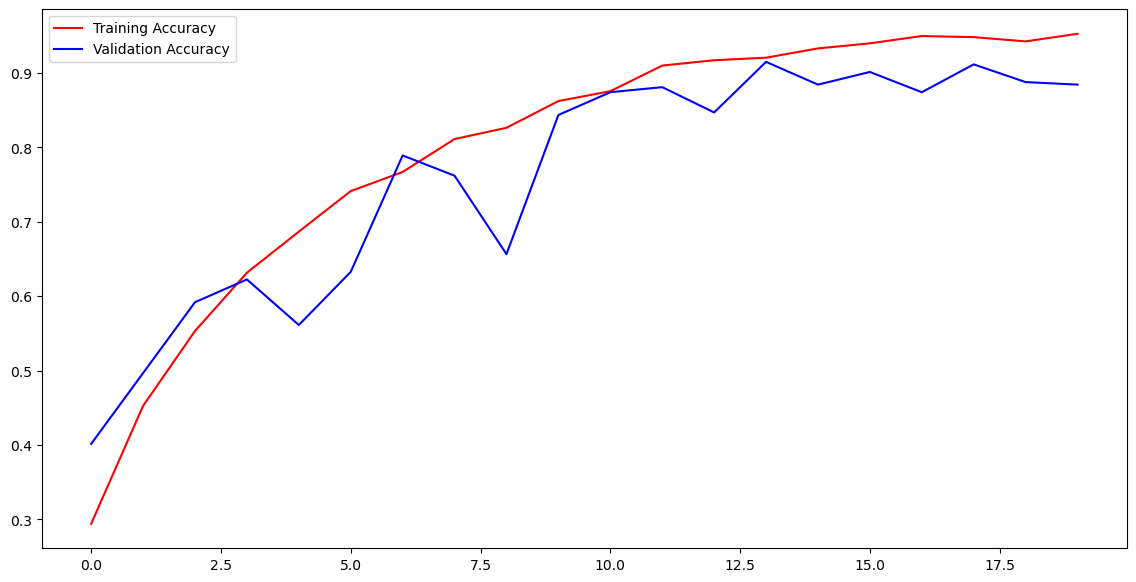

In [14]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

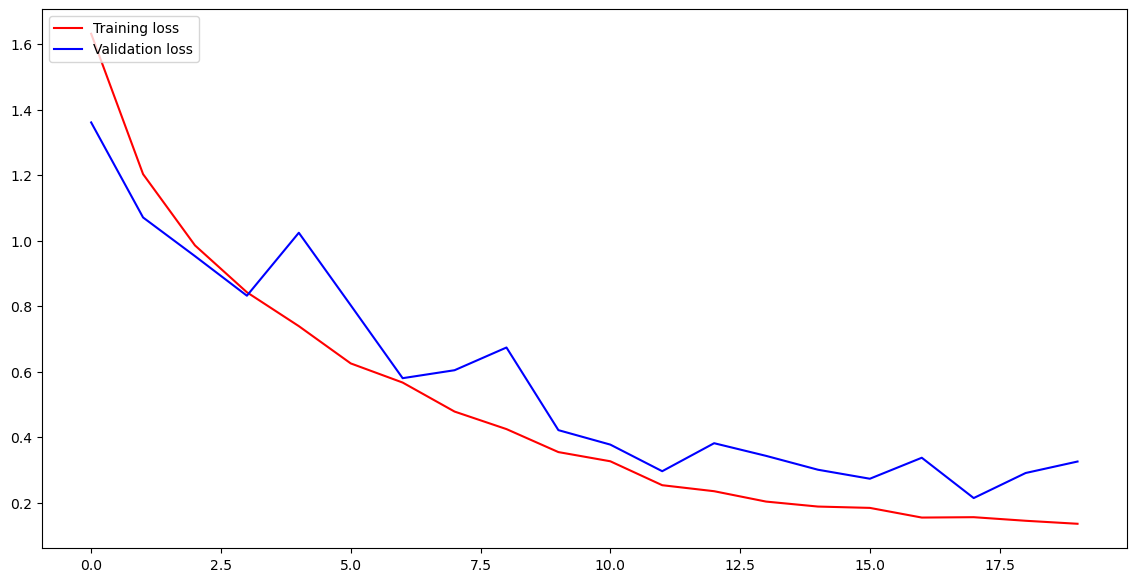

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [21]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [34]:
import cv2
import numpy as np

In [81]:
img = cv2.imread('C:\\Users\\Sharmitha\\Documents\\Data Analytics\\CP2 DATA\\Training\\pituitary_tumor\\p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [82]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

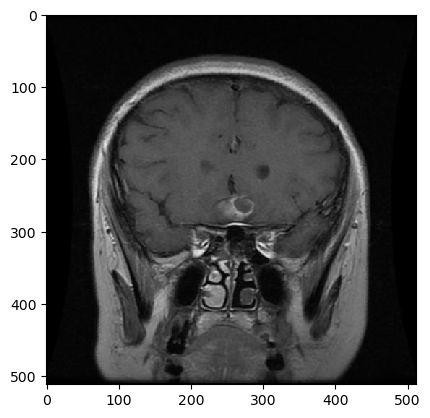

In [85]:
from tensorflow.keras.preprocessing import image
img = image.load_img('C:\\Users\\Sharmitha\\Documents\\Data Analytics\\CP2 DATA\\Training\\pituitary_tumor\\p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [84]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 581ms/step


3